In [7]:
import pandas as pd
import os
import seaborn as sns
from dotenv import load_dotenv
load_dotenv("../../.env")
AFDB_JESS_SCAN_TABLE = os.getenv("AFDB_JESS_SCAN_TABLE")
AFDB_SCAN_SEQS = os.getenv("AFDB_SCAN_SEQS")

In [2]:
df = pd.read_csv(AFDB_JESS_SCAN_TABLE)
seq_df = pd.read_csv(AFDB_SCAN_SEQS)

In [3]:
uniprot_accs = df[df["probability"]>.65]["uniprot_acc"].unique()
with open("output/sequences.fasta", "wt") as fh:
    for index, row in seq_df[seq_df["uniprot_acc"].isin(uniprot_accs)].iloc[:10].iterrows():
        fh.write(">{}\n{}\n".format(row["uniprot_acc"], row["sequence"]))

In [4]:
res_df = pd.read_table("output/results/results_idp.tsv")

<Axes: xlabel='probability_Adh', ylabel='Count'>

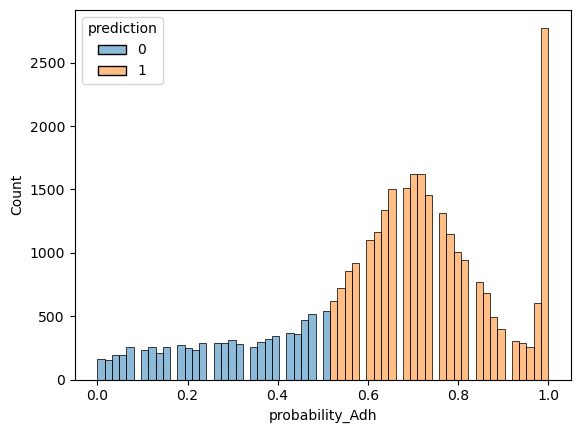

In [16]:
sns.histplot(res_df, x="probability_Adh", hue="prediction")